<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading Data</a></span></li><li><span><a href="#Sampling-Without-Respecting-Correlation" data-toc-modified-id="Sampling-Without-Respecting-Correlation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sampling Without Respecting Correlation</a></span></li><li><span><a href="#First-Realization-of-1000-Samples-from-Variables" data-toc-modified-id="First-Realization-of-1000-Samples-from-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First Realization of 1000 Samples from Variables</a></span></li><li><span><a href="#Second-Realization-of-1000-Samples-from-Variables" data-toc-modified-id="Second-Realization-of-1000-Samples-from-Variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Second Realization of 1000 Samples from Variables</a></span></li><li><span><a href="#Uncertainty-in-the-Mean-for-500-samples" data-toc-modified-id="Uncertainty-in-the-Mean-for-500-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uncertainty in the Mean for 500 samples</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import pylab as plt
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
import scipy.linalg
import pprint
import scipy
import scipy.stats

# Reading Data

In [3]:
df_r = pd.read_csv("Data.csv",na_values=['NA','?',' '])
df_r.head()

,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5
0,6.253801,91.596422,62.611256,32.035430,10.109288
1,5.587227,83.318613,57.378532,24.485243,11.166546
2,3.858376,60.966904,57.404418,27.299659,11.488222
3,5.089754,91.243639,60.872037,27.959768,10.421839
4,6.331305,100.998356,54.506963,28.493338,12.346740


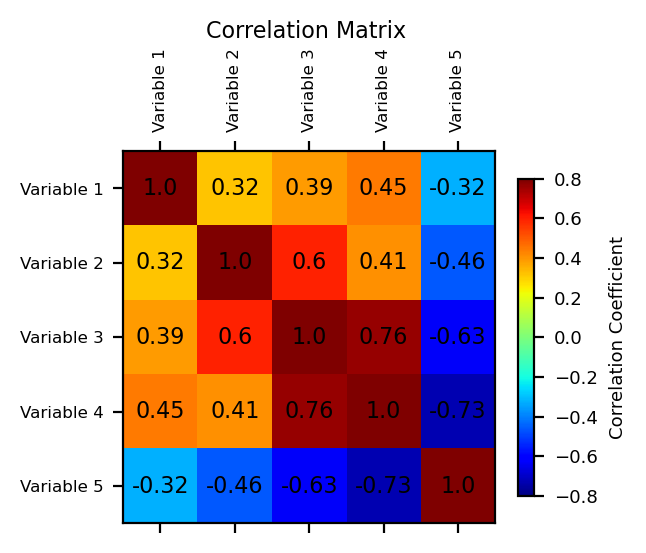

In [4]:
# Plot covariance matrix between lag distances
font = {'size'   : 6.5}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(3, 3), dpi= 200, facecolor='w', edgecolor='k')
#
val=df_r.values
columns=list(df_r.columns); corr=np.zeros((len(val[0]),len(val[0])))
for i in range(len(val[0])):
    a=val[:,i]
    for j in range(len(val[0])):
        b=val[:,j]
        corr[j,i] = np.corrcoef(a,b)[0,1]
        c = np.corrcoef(a,b)[0,1]
        ax.text(i, j, str(round(c,2)), va='center', ha='center',fontsize=8)
cax =ax.matshow(corr, cmap='jet', interpolation='nearest',vmin=-0.8, vmax=0.8)  
fig.colorbar(cax,shrink=0.7,label='Correlation Coefficient')
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns,fontsize=6, rotation='vertical')
ax.set_yticks(np.arange(len(columns)))
ax.set_yticklabels(columns,fontsize=6)
plt.title('Correlation Matrix ', fontsize=8,y=1.26)

plt.show() 

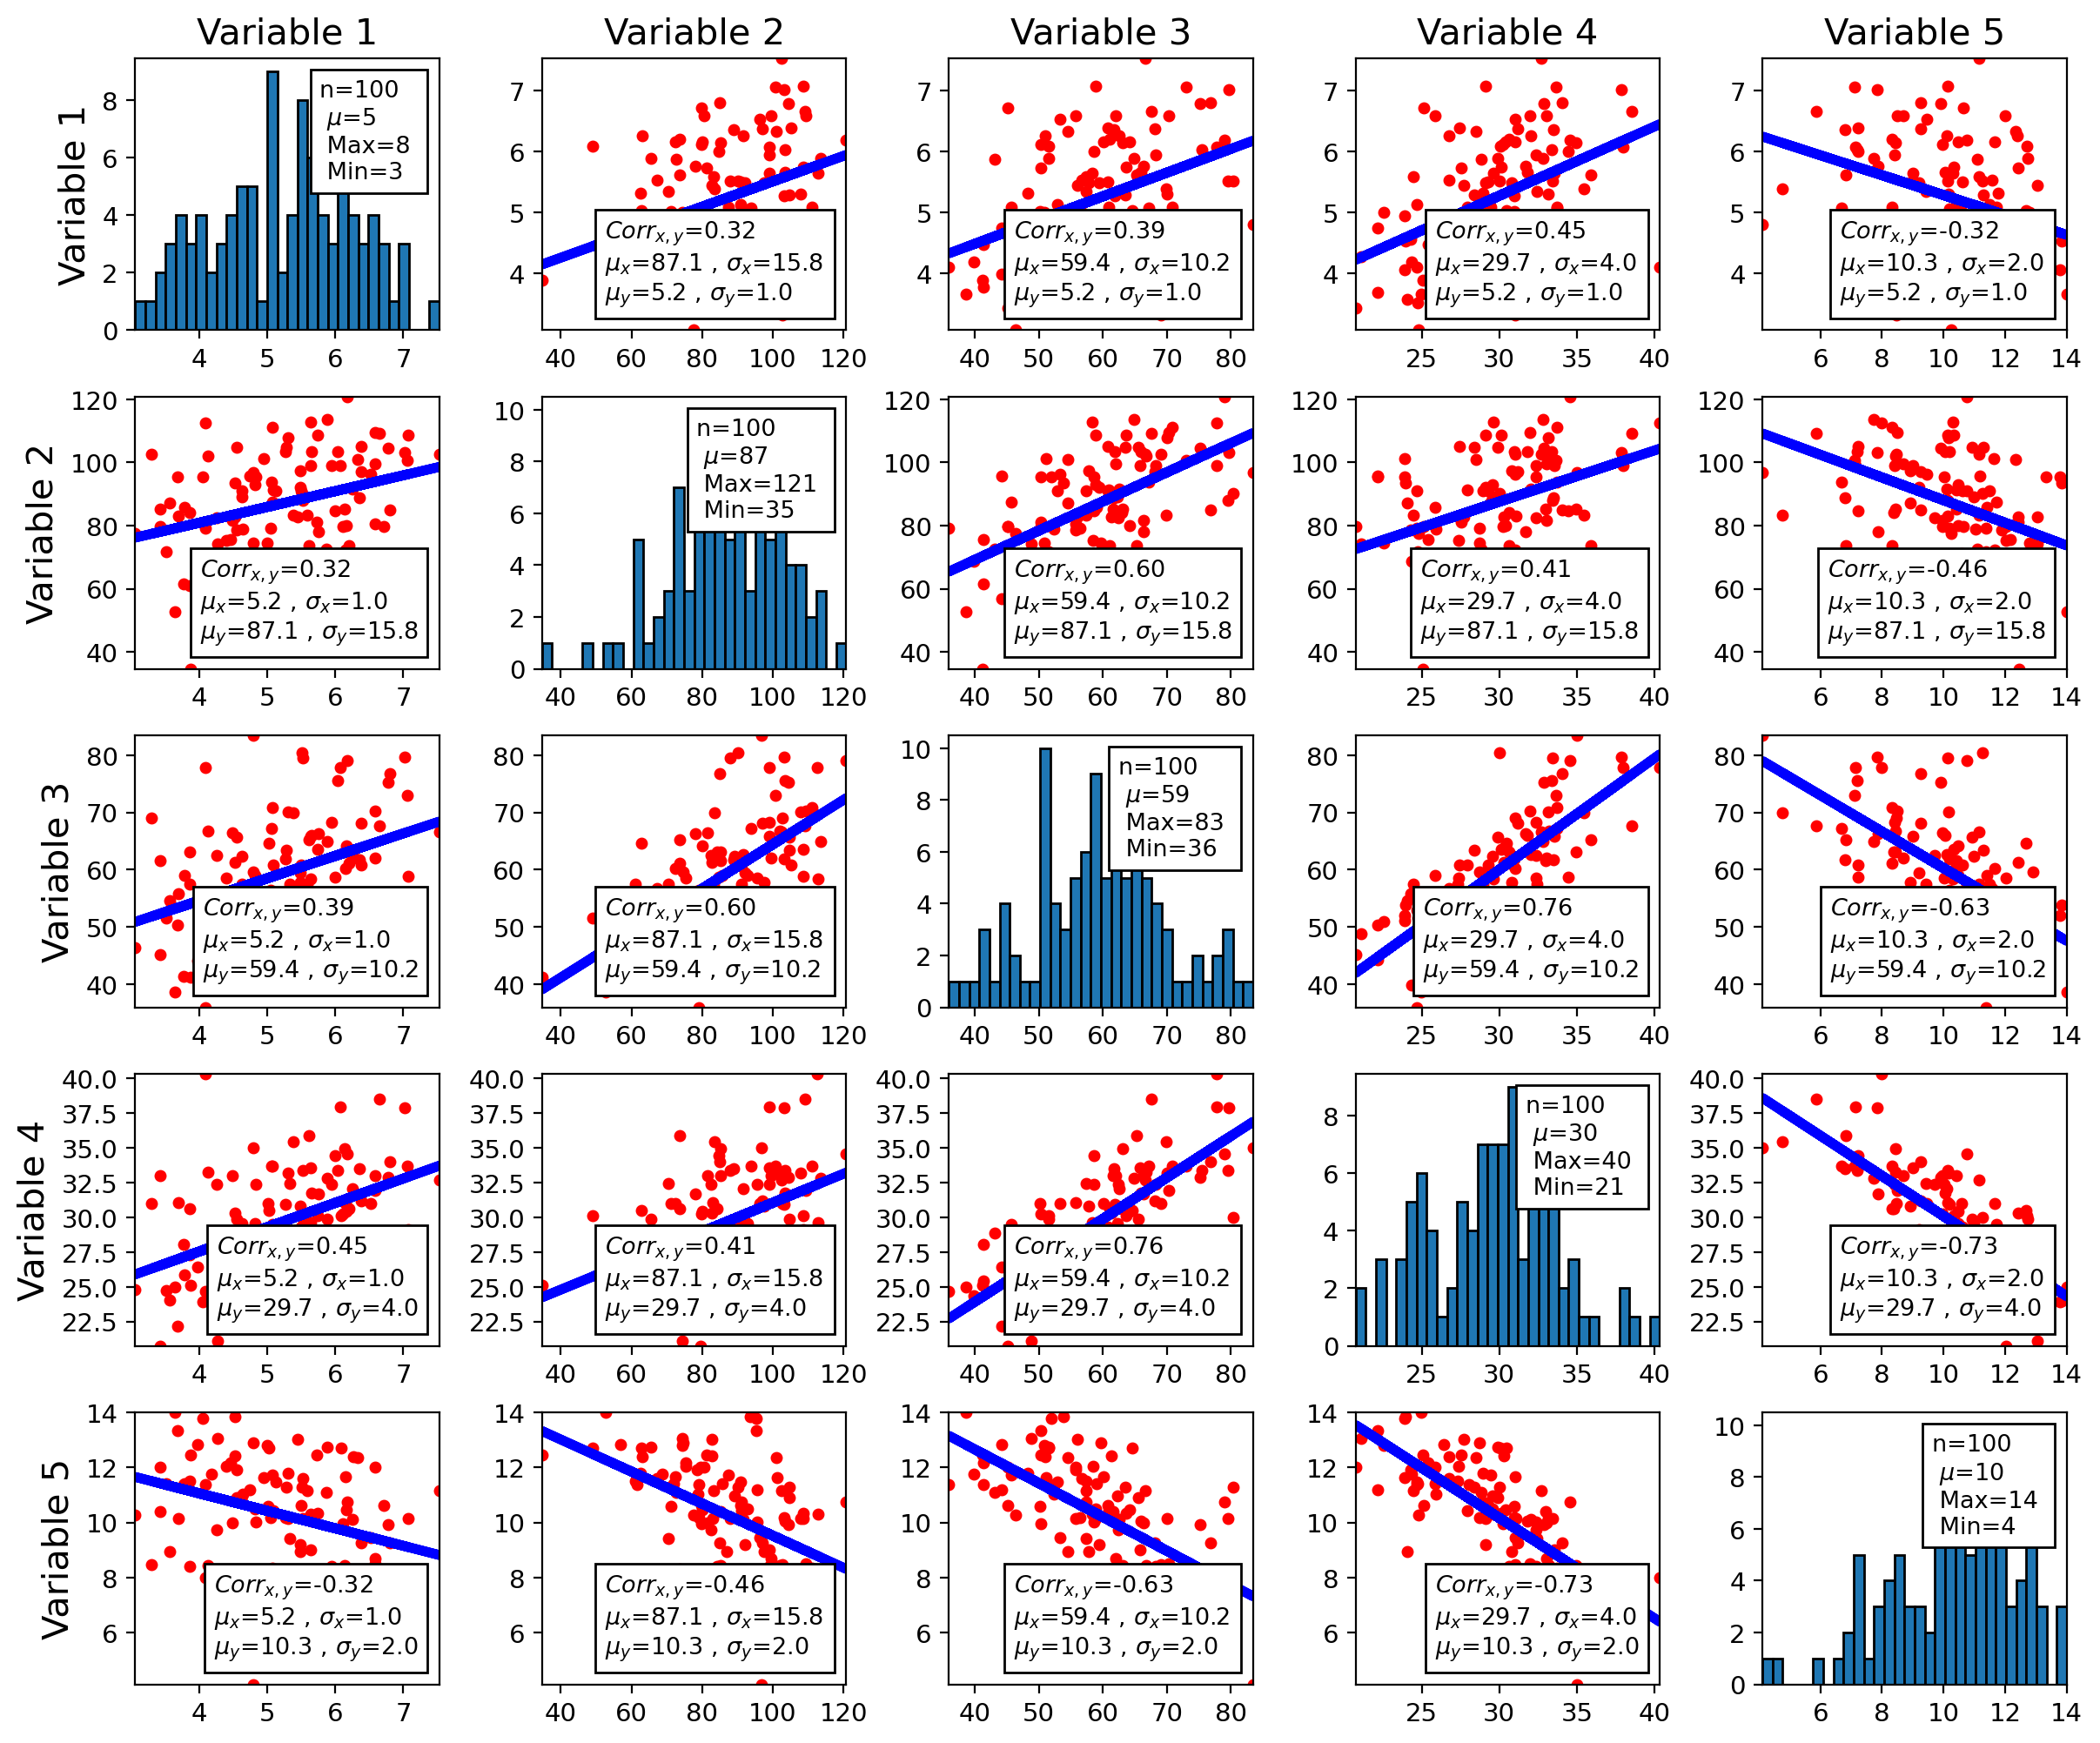

In [6]:
font = {'size'   :15 }
fig=plt.figure(figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')

ir=0;iu=5;title=''
xlabl=None;ylabl=None
for j in range (iu):
    for i in range(iu):
        title='';xlabl=None;ylabl=None
        ir+=1
        if (i==j):
            ax1 = plt.subplot(iu,iu,ir)
            x_=val[:,i]
            xlimt=(x_.min(),x_.max())
            if(i==0 and j==0): title=columns[i];ylabl=columns[i];
            else: title='';xlabl=None;ylabl=None      
            histplt (x_,30,title=title,
                 xlabl=xlabl,ylabl=ylabl,xlimt=xlimt,ylimt=None,axt=ax1,scale=1.0)
        else:
            ax1 = plt.subplot(iu,iu,ir)
            title=''
            xlabl=None;ylabl=None
            x_=val[:,i] ; y_=val[:,j]
            if(j==0): title=columns[i]
            elif(i==0): ylabl=columns[j]   
            CrossPlot(x_,y_,title=title,
                      xlabl=xlabl,ylabl=ylabl,loc=2,xlimt=(x_.min(),x_.max()),
                      ylimt=(y_.min(),y_.max()),axt=ax1,scale=1.0)
fig.tight_layout(pad=1)

# First Realization of 1000 Samples from Variables

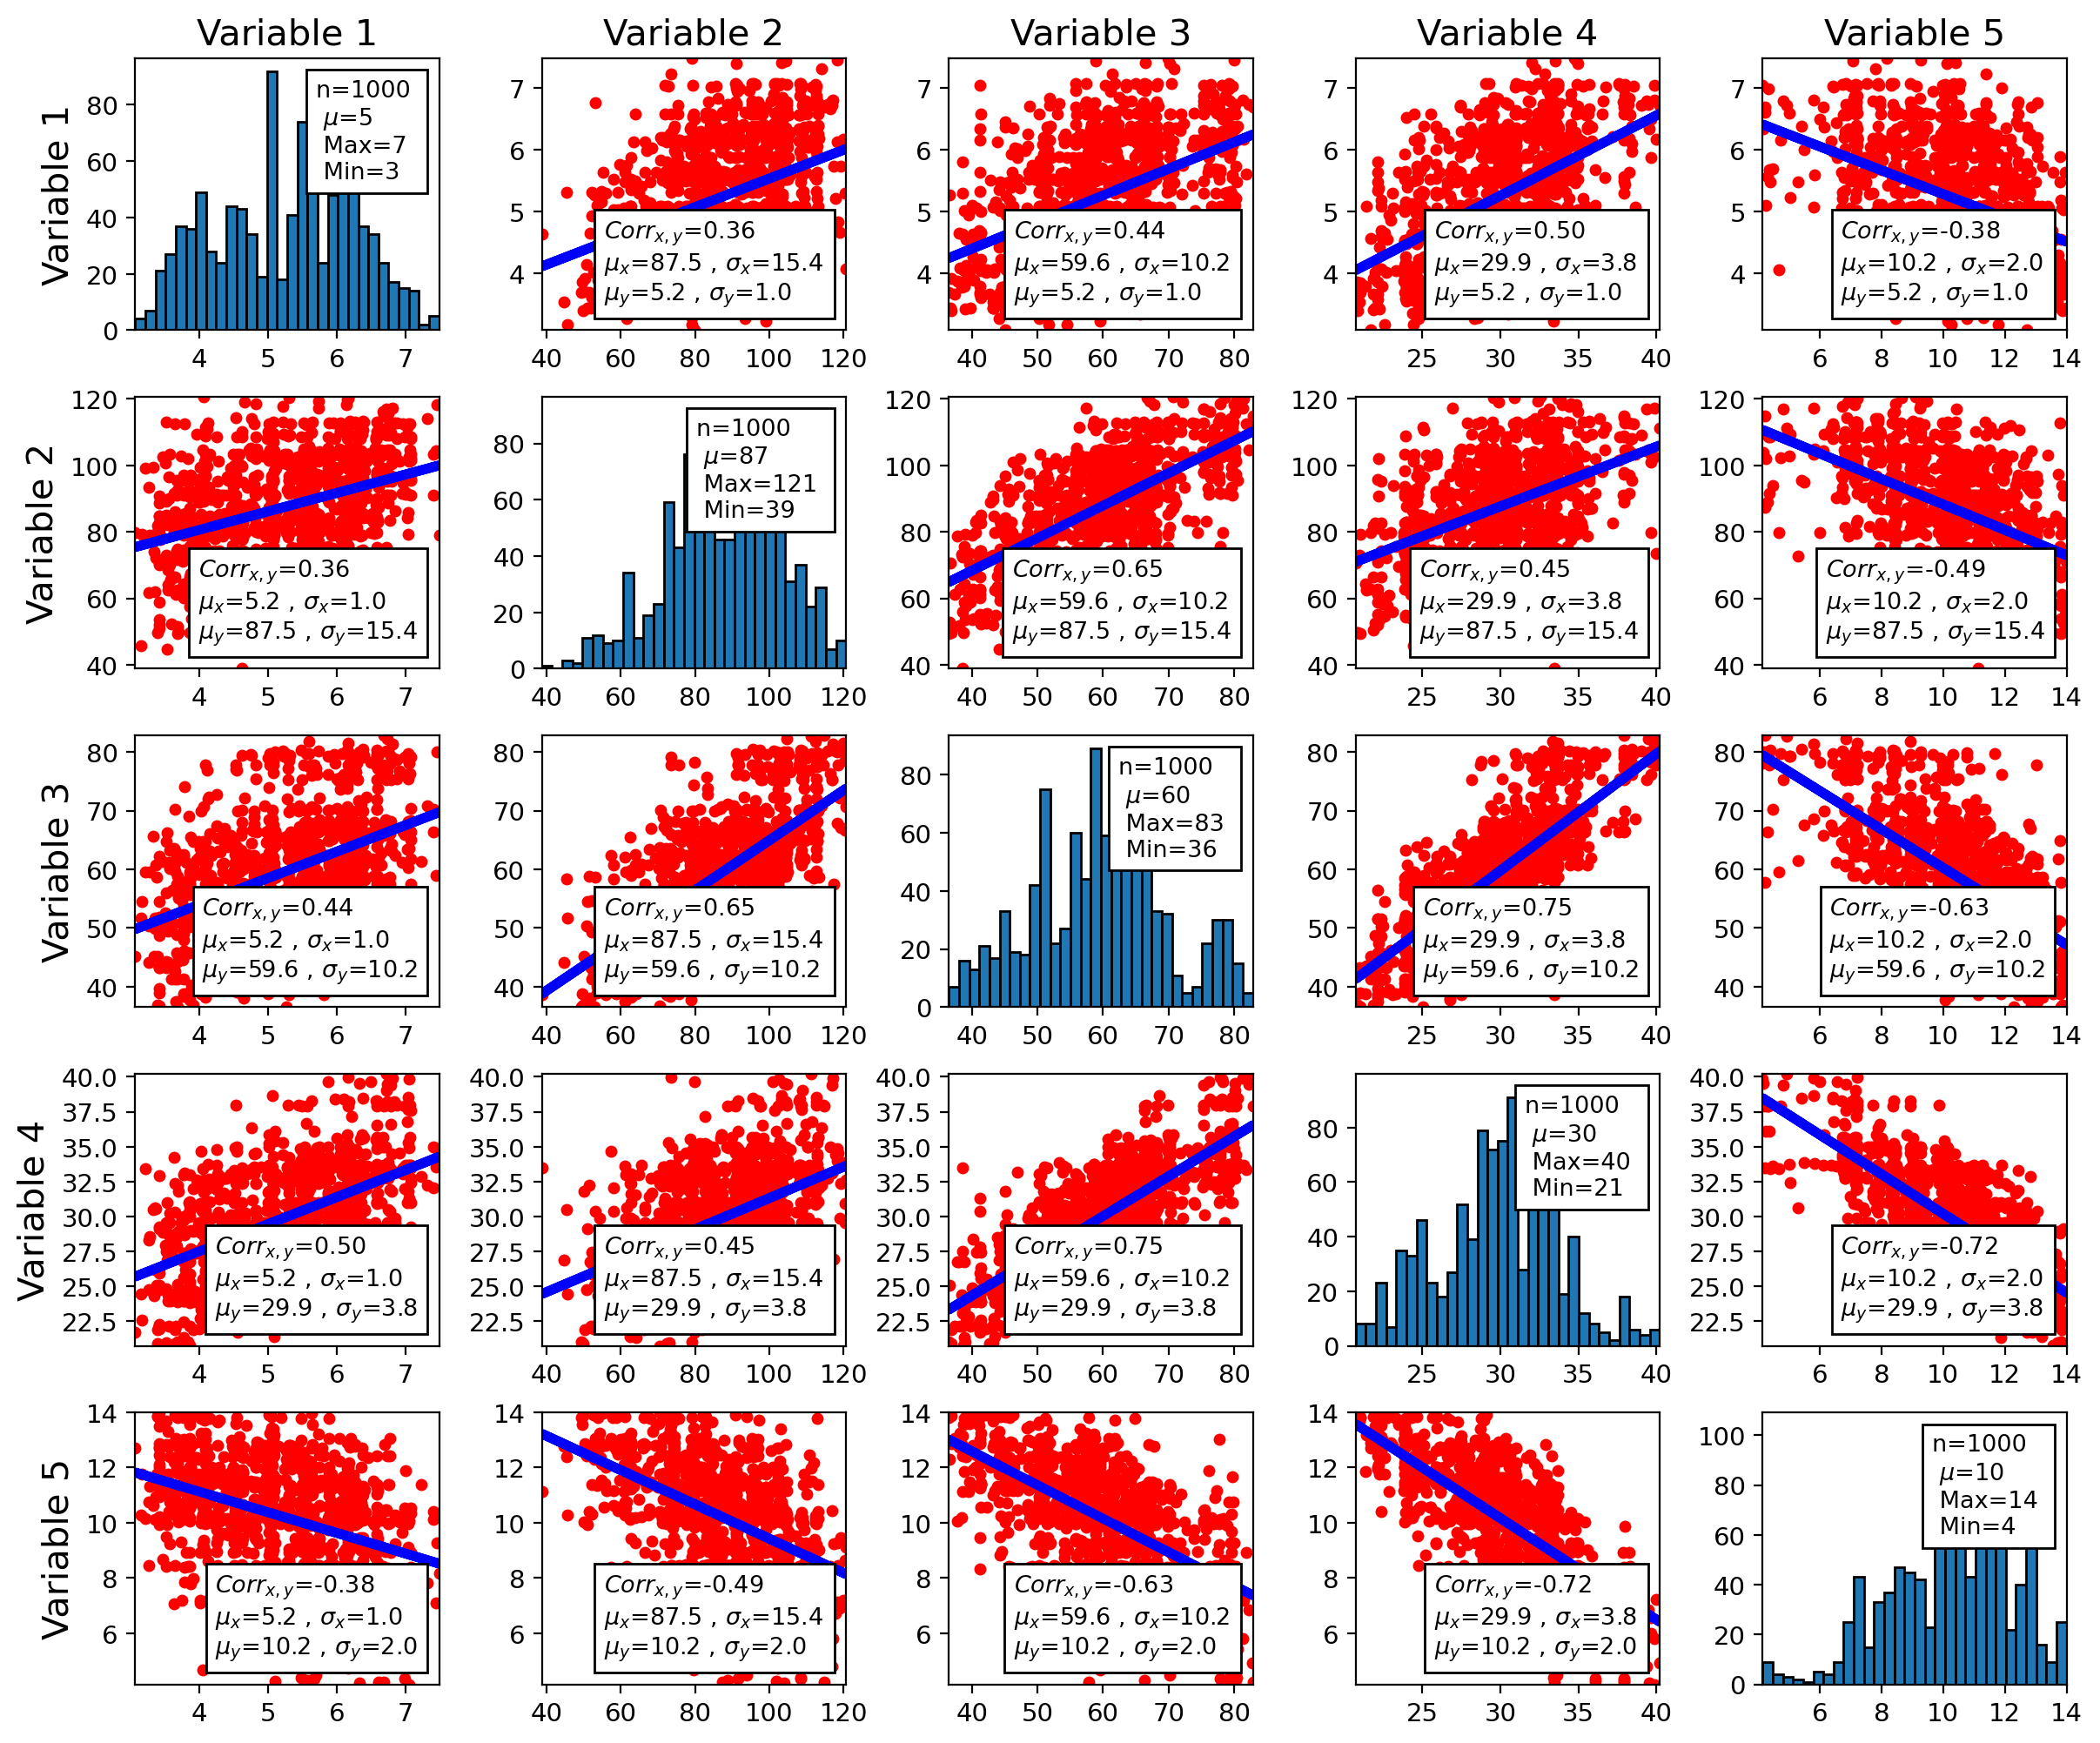

In [13]:
val=df_r.values
Samp=LUSim(value=val,corr=corr,nsample=1000,nsim=1,mean=False,seed=75)

font = {'size'   :15 }
fig=plt.figure(figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')

ir=0;nvar=5;title=''; Samp_=Samp[0]
xlabl=None;ylabl=None
for j in range (nvar):
    for i in range(nvar):
        title='';xlabl=None;ylabl=None
        ir+=1
        if (i==j):
            ax1 = plt.subplot(nvar,nvar,ir)
            x_=Samp_[i]
            xlimt=(np.min(x_),np.max(x_))
            if(i==0 and j==0): title=columns[i];ylabl=columns[i];
            else: title='';xlabl=None;ylabl=None      
            histplt (x_,30,title=title,
                 xlabl=xlabl,ylabl=ylabl,xlimt=xlimt,ylimt=None,axt=ax1,scale=1.0)
        else:
            ax1 = plt.subplot(nvar,nvar,ir)
            title=''
            xlabl=None;ylabl=None
            x_=Samp_[i] ; y_=Samp_[j]
            if(j==0): title=columns[i]
            elif(i==0): ylabl=columns[j]   
            CrossPlot(x_,y_,title=title,
                      xlabl=xlabl,ylabl=ylabl,loc=2,xlimt=(np.min(x_),np.max(x_)),
                      ylimt=(np.min(y_),np.max(y_)),axt=ax1,scale=1.0)
fig.tight_layout(pad=1)

# Second Realization of 1000 Samples from Variables

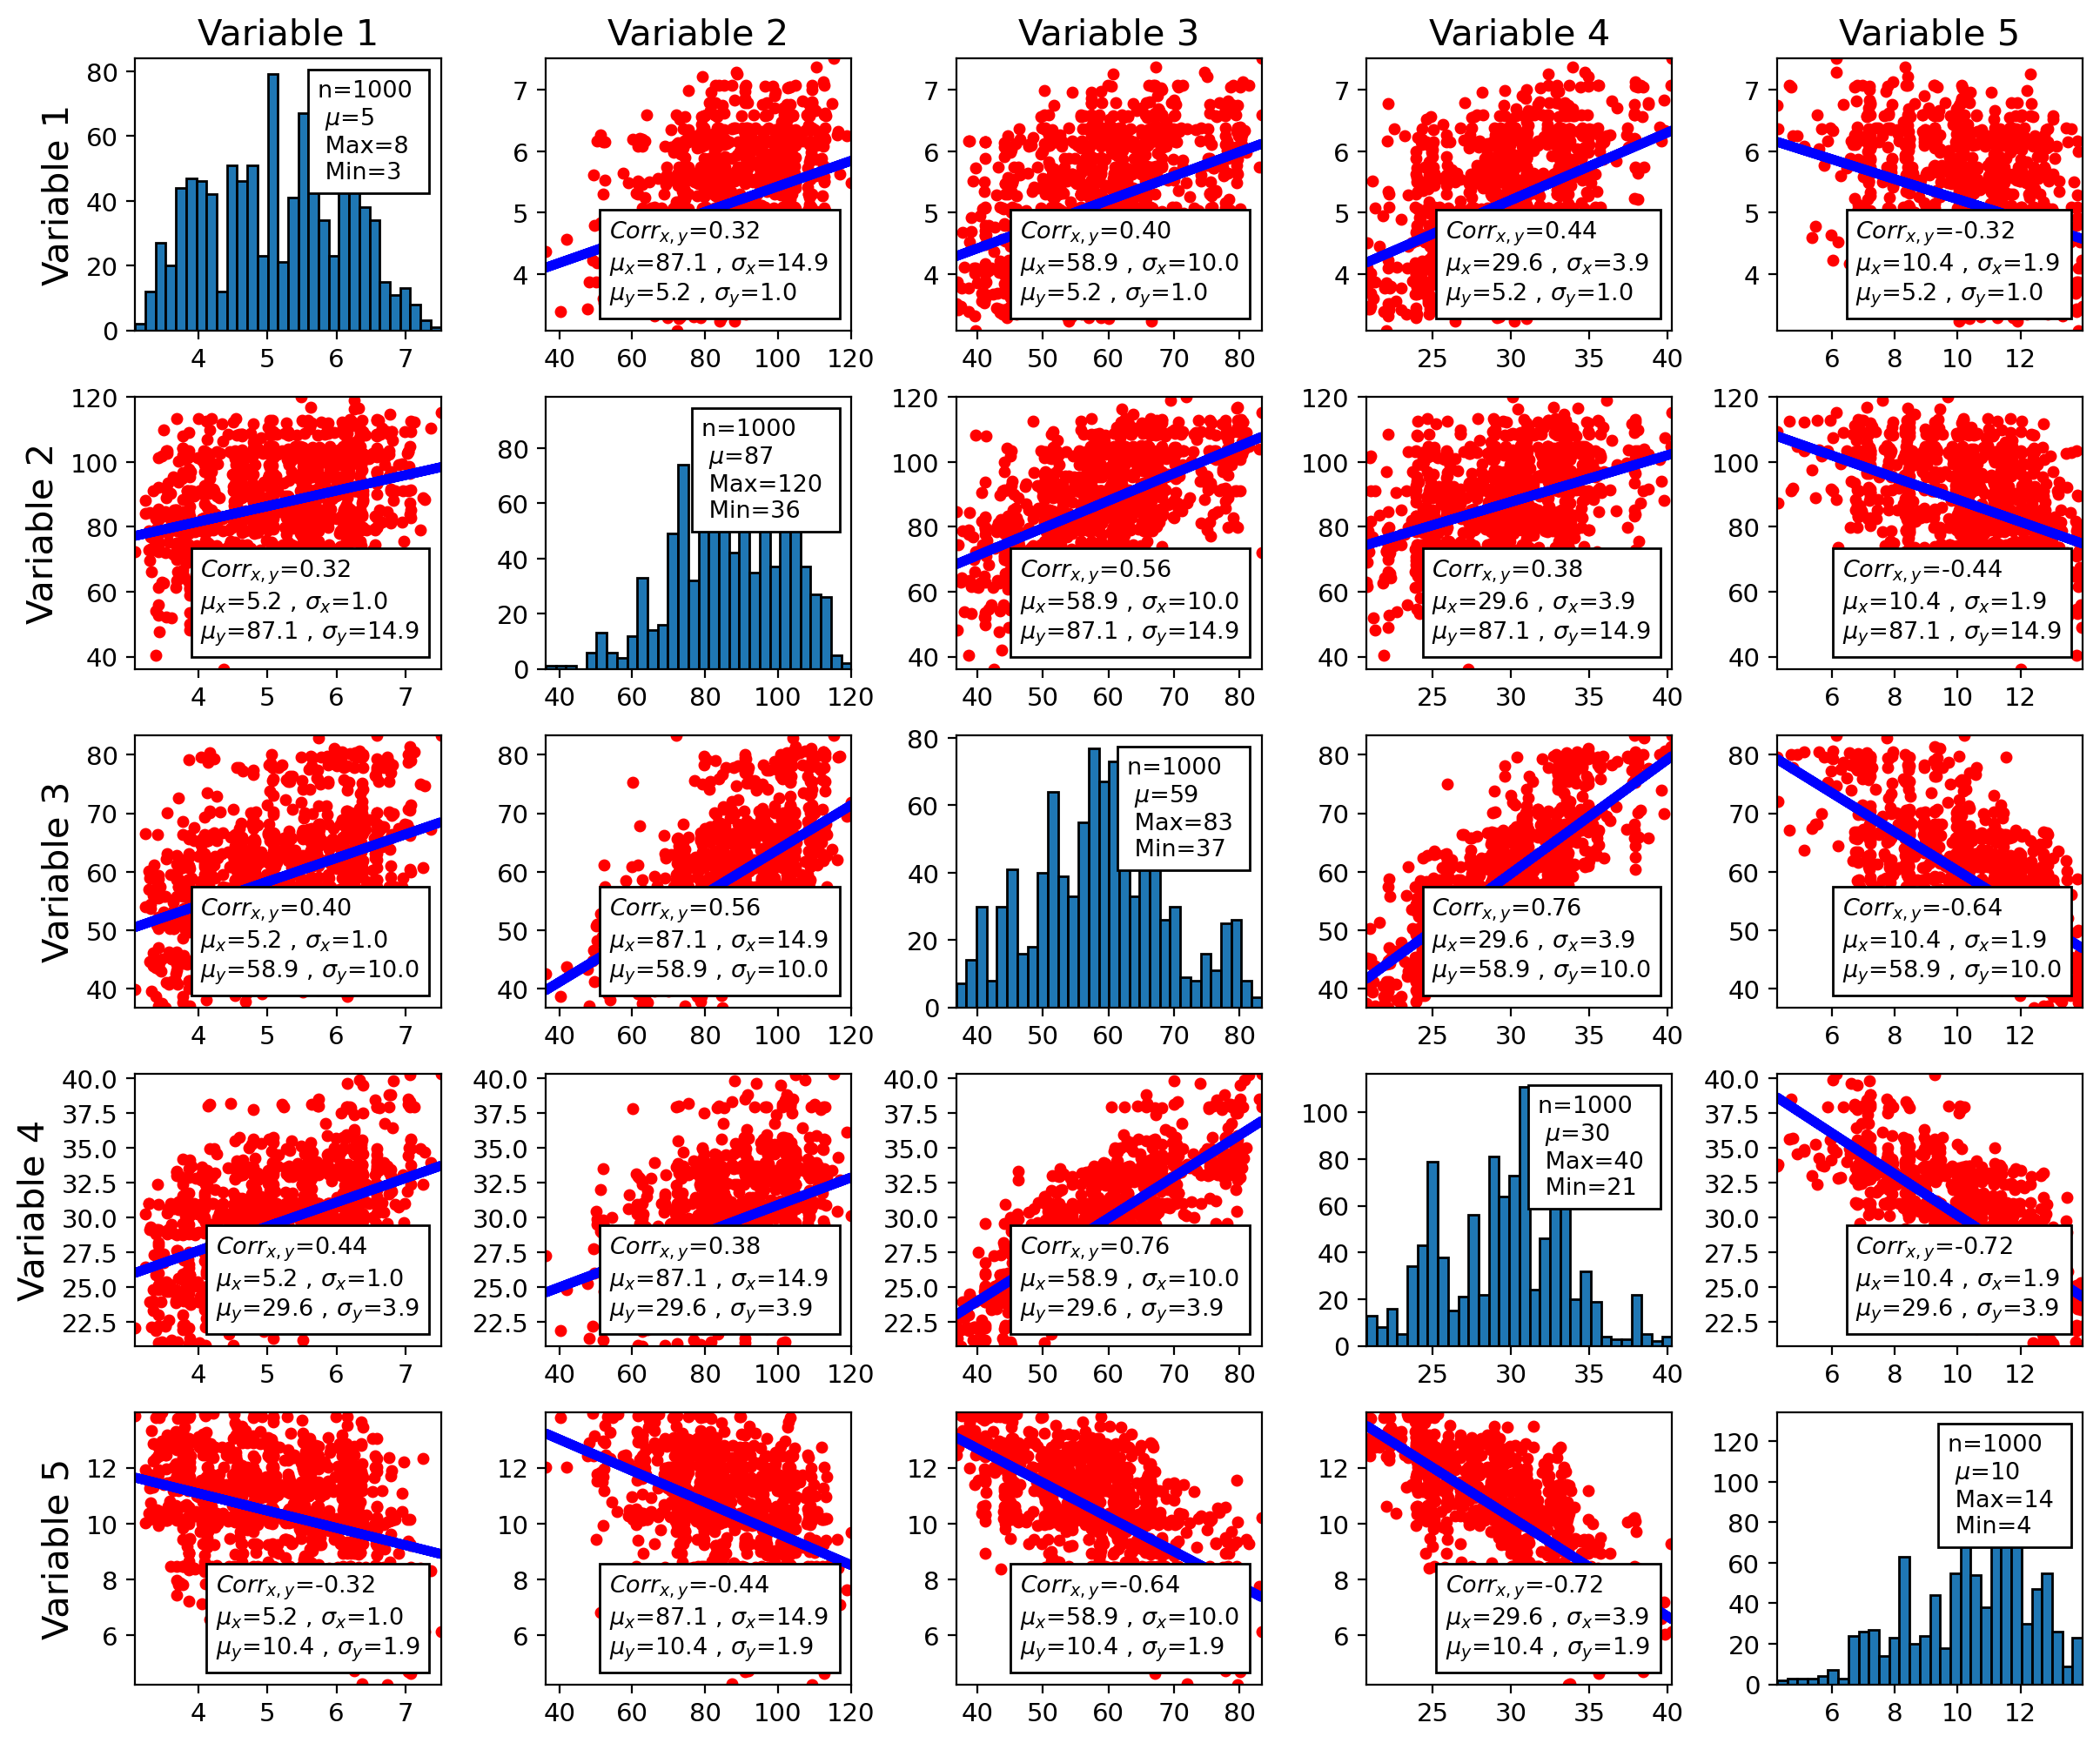

In [14]:
val=df_r.values
Samp=LUSim(value=val,corr=corr,nsample=1000,nsim=1,mean=False,seed=85)

font = {'size'   :15 }
fig=plt.figure(figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')

ir=0;nvar=5;title=''; Samp_=Samp[0]
xlabl=None;ylabl=None
for j in range (nvar):
    for i in range(nvar):
        title='';xlabl=None;ylabl=None
        ir+=1
        if (i==j):
            ax1 = plt.subplot(nvar,nvar,ir)
            x_=Samp_[i]
            xlimt=(np.min(x_),np.max(x_))
            if(i==0 and j==0): title=columns[i];ylabl=columns[i];
            else: title='';xlabl=None;ylabl=None      
            histplt (x_,30,title=title,
                 xlabl=xlabl,ylabl=ylabl,xlimt=xlimt,ylimt=None,axt=ax1,scale=1.0)
        else:
            ax1 = plt.subplot(nvar,nvar,ir)
            title=''
            xlabl=None;ylabl=None
            x_=Samp_[i] ; y_=Samp_[j]
            if(j==0): title=columns[i]
            elif(i==0): ylabl=columns[j]   
            CrossPlot(x_,y_,title=title,
                      xlabl=xlabl,ylabl=ylabl,loc=2,xlimt=(np.min(x_),np.max(x_)),
                      ylimt=(np.min(y_),np.max(y_)),axt=ax1,scale=1.0)
fig.tight_layout(pad=1)

# Uncertainty in the Mean for 500 samples

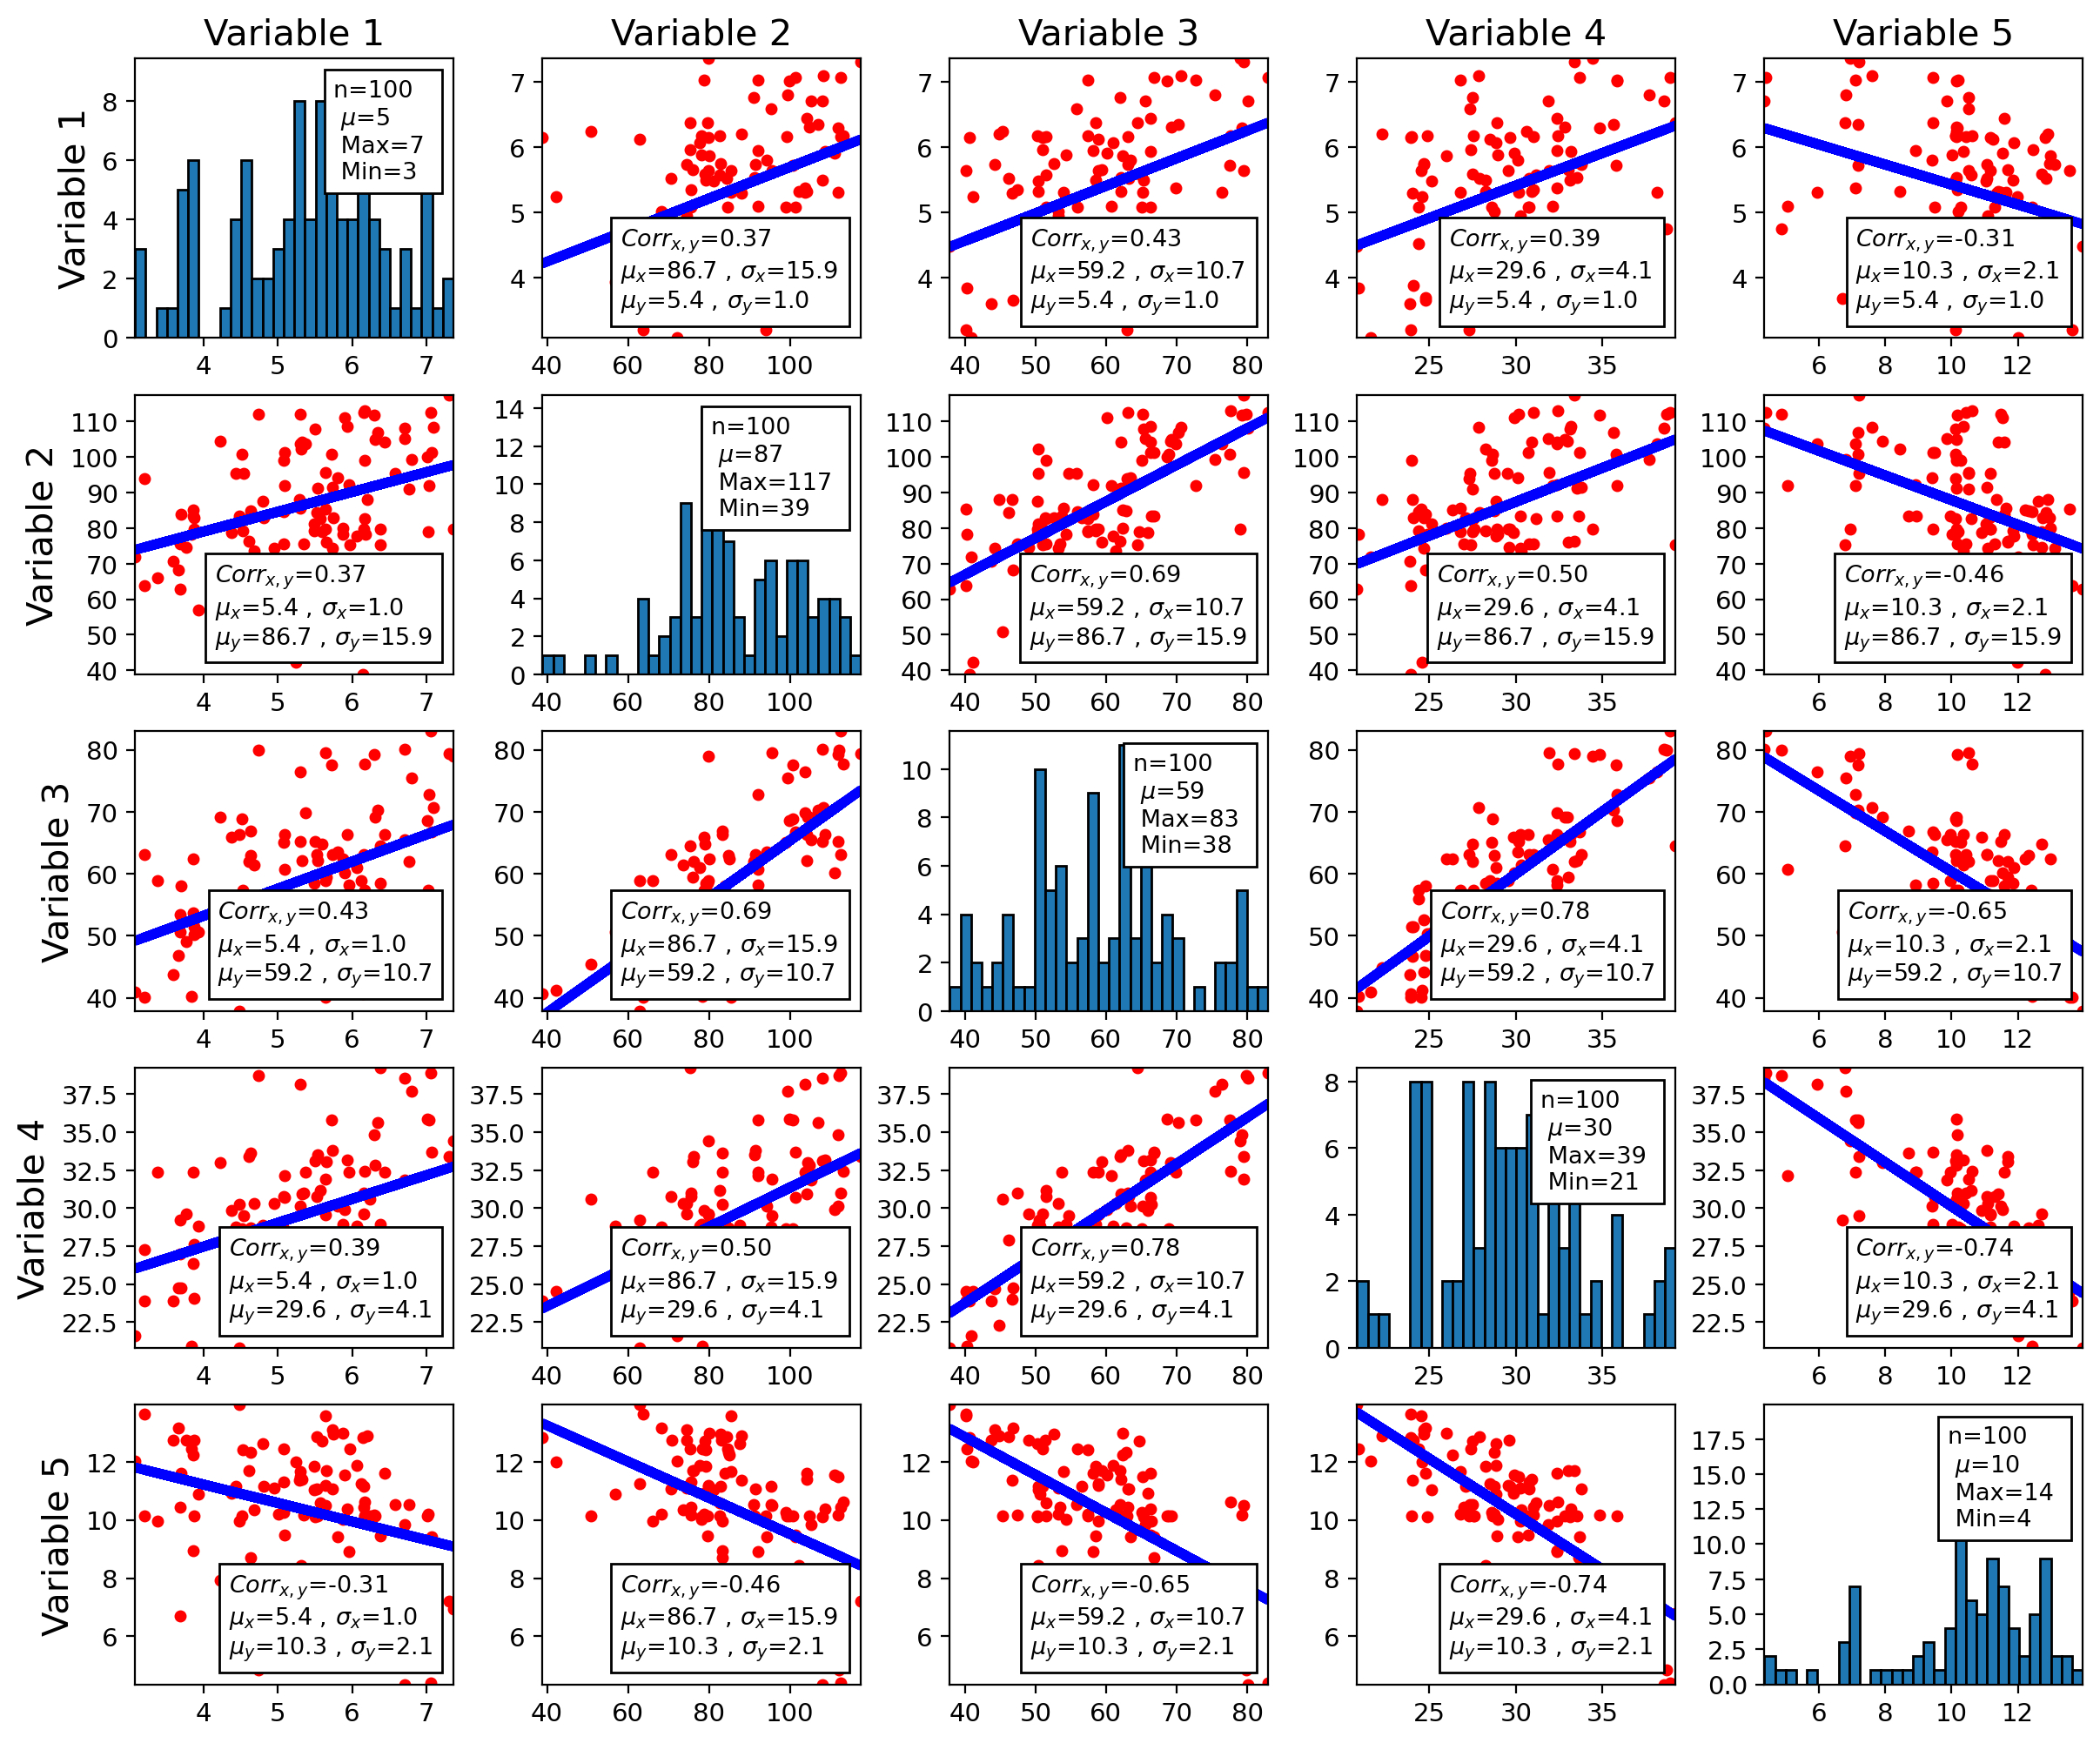

In [34]:
val=df_r.values
Samp=LUSim(value=val,corr=corr,nsample=100,nsim=500,mean=True,seed=90)

font = {'size'   :15 }
fig=plt.figure(figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')

ir=0;nvar=5;title=''; Samp_=Samp[0]
xlabl=None;ylabl=None
for j in range (nvar):
    for i in range(nvar):
        title='';xlabl=None;ylabl=None
        ir+=1
        if (i==j):
            ax1 = plt.subplot(nvar,nvar,ir)
            x_=Samp_[i]
            xlimt=(np.min(x_),np.max(x_))
            if(i==0 and j==0): title=columns[i];ylabl=columns[i];
            else: title='';xlabl=None;ylabl=None      
            histplt (x_,30,title=title,
                 xlabl=xlabl,ylabl=ylabl,xlimt=xlimt,ylimt=None,axt=ax1,scale=1.0)
        else:
            ax1 = plt.subplot(nvar,nvar,ir)
            title=''
            xlabl=None;ylabl=None
            x_=Samp_[i] ; y_=Samp_[j]
            if(j==0): title=columns[i]
            elif(i==0): ylabl=columns[j]   
            CrossPlot(x_,y_,title=title,
                      xlabl=xlabl,ylabl=ylabl,loc=2,xlimt=(np.min(x_),np.max(x_)),
                      ylimt=(np.min(y_),np.max(y_)),axt=ax1,scale=1.0)
fig.tight_layout(pad=1)

# Appendix

In [5]:
def LUSim(value,corr,nsample,nsim,mean,seed):
    """
    value   : distribution of each variable
    corr    : correlation matrix between variable
    nsample : number of sampling from data ditribution    
    nsim    : number of simulation
    mean    : ask if distribution of the mean is return or not
    
    """
    np.random.seed(seed)
    t_dist = scipy.stats.t(seed)
    matrix=corr
    L=scipy.linalg.cholesky(matrix, lower=True, overwrite_a=True)
    mu=0; sigma=1; nvar=len(matrix)
    w=np.zeros((nvar,nsample)) 
    N_Sim_R_val=[]; Mean_Sim_=[]
    for isim in range(nsim):
        # LU Simulation for Standard Gaussian
        for i in range (nvar):
            for j in range(nsample):
                Dist = np.random.normal(mu, sigma, nsample)
                w[i,:]=Dist
        Sim_R_val=[]
        N_var=[]
        for i in range(nsample):
            tmp=(np.matmul(L,w[:,i]))
            N_var.append(tmp)       
        N_var=np.array(N_var).transpose()   
        Sim_R_val=[]; Mean_Sim_tmp=[]
        for i1 in range(nvar):
            R_tmp=[]
            for i2 in range(nsample):
                prob=t_dist.cdf(N_var[i1][i2])
                R_tmp.append(np.quantile(value[:,i1], prob, axis=0, keepdims=True)[0])
            Sim_R_val.append(R_tmp)  
            if(mean==True) : Mean_Sim_tmp.append(np.mean(R_tmp))
        if(mean==True):
            Mean_Sim_.append(Mean_Sim_tmp)
        else:
            N_Sim_R_val.append(Sim_R_val)
        
    return N_Sim_R_val

####################################################################

def RandSim(value,nsample,seed):
    """
    nsample: number of sampling from data ditribution
    corr   : correlation matrix between variable
    val    : distribution of each variable
    nsim   : number of simulation
    """
    np.random.seed(seed)
    Samp=[]
    for j in range(len(value)):
        prob=np.ravel(np.random.rand(1,nsample))
        tmp=[]
        for i in range(len(prob)):
            tmp.append(np.quantile(value[:,j], prob[i], axis=0, keepdims=True)[0])  
        Samp.append(tmp)   
    Samp=np.array(Samp) 
    return Samp

####################################################################

def CrossPlot (x,y,title,xlabl,ylabl,loc,xlimt,ylimt,axt=None,scale=0.8):
    #
    ax1 = axt or plt.axes()
    x=np.array(x)
    y=np.array(y)    
    n_x=len(x)
    Mean_x=np.mean(x)
    SD_x=np.sqrt(np.var(x)) 
    #
    n_y=len(y)
    Mean_y=np.mean(y)
    SD_y=np.sqrt(np.var(y)) 
    corr=np.corrcoef(x,y)
    txt='$Corr_{x,y}$=%.2f \n $n$=%.0f \n $\mu_{x}$=%.0f $,\,\sigma_{x}$=%.0f \n'
    txt+='$\mu_{y}$=%.0f $,\,\sigma_{y}$=%.0f'
    txt='$Corr_{x,y}$=%.2f \n$\mu_{x}$=%.1f $,\,\sigma_{x}$=%.1f \n'
    txt+='$\mu_{y}$=%.1f $,\,\sigma_{y}$=%.1f'
    anchored_text = AnchoredText(txt %(corr[1,0],Mean_x,SD_x,Mean_y,SD_y), loc=4,
                                 prop={ 'size': font['size']*0.65})
    ax1.add_artist(anchored_text)
    Lfunc1=np.polyfit(x,y,1)
    vEst=Lfunc1[0]*x+Lfunc1[1]    
    try:
        title
    except NameError:
        pass  # do nothing! 
    else:
        plt.title(title,fontsize=font['size']*(scale))   
#
    try:
        xlabl
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlabel(xlabl,fontsize=font['size']*scale)            
#
    try:
        ylabl
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylabel(ylabl,fontsize=font['size']*scale)        
        
    try:
        xlimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlim(xlimt)   
#        
    try:
        ylimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylim(ylimt)   
      
    plt.plot(x,y,'ro',markersize=4)   
    ax1.plot(x, vEst,'b-',linewidth=4)   
    
    plt.xticks(fontsize=font['size']*0.7)    
    plt.yticks(fontsize=font['size']*0.7)    

####################################################################
    
def histplt (val,bins,title,xlabl,ylabl,xlimt,ylimt,axt=None,scale=0.55):
    #
    ax1 = axt or plt.axes()
    val=np.array(val)
    try:
        bins
    except NameError:
        plt.hist(val, bins=bins,ec='black')   
    else:
        plt.hist(val, bins=bins,ec='black')      
    n=len(val)
    Mean=np.mean(val)
    SD=np.var(val) 
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.0f \n Max=%.0f \n Min=%.0f'
    anchored_text = AnchoredText(txt %(n,Mean,Max,Min), loc=1,prop={ 'size': font['size']*0.65})   
    
    ax1.add_artist(anchored_text)
    try:
        title
    except NameError:
        plt.title('Histogram',fontsize=font['size']*(scale))    
    else:
        plt.title(title,fontsize=font['size']*(scale))   
#
    try:
        xlabl
    except NameError:
        pass  # do nothing! 
        plt.xlabel('X',fontsize=font['size']*scale)      
    else:
        plt.xlabel(xlabl,fontsize=font['size']*scale)    
        
    try:
        ylabl
    except NameError:
        pass  # do nothing!     
    else:
        plt.ylabel(ylabl,fontsize=font['size']*scale)          
        
#        
    try:
        xlimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlim(xlimt)   
#        
    try:
        ylimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylim(ylimt)
        
    plt.xticks(fontsize=font['size']*0.7)    
    plt.yticks(fontsize=font['size']*0.7)    